# 🧪 Preparcial – Caso de Negocio “YumFit”
## Escenario
Eres el/la **Chief Marketing Officer (CMO)** de **YumFit**, una start-up que vende snacks saludables 100 % online.  
Tu equipo de Data te entrega un dataset con historial de 150 clientes (`df`) y te aprueban un presupuesto de **US$10 000** para la próxima campaña de retención y cross-selling.

### Misión
Sigue el **paso a paso** y toma decisiones que evolucionan de lo descriptivo a la recomendación táctica:
1. Conocer la base de clientes → *EDA*  
2. Calcular **CAC** y **LTV** → *Métricas de negocio*  
3. Segmentar en **4 clusters** con *K-Means* → *Inteligencia de clientes*  
4. Evaluar el valor de cada cluster → *Trade-offs*  
5. Hacer **profiling** (nombre + storytelling) → *Comunicación*  
6. Asignar presupuesto y justificar → *Decisión ejecutiva*

---
### Instrucciones
Ejecuta cada celda, responde las preguntas (P1…P12) y prepara un informe ejecutivo breve al final.

In [ ]:
!wget "https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos (1).csv"

--2025-05-08 15:24:16--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv [following]
--2025-05-08 15:24:17--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/clientes_segmentos%20(1).csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1032085 (1008K) [text/plain]
Saving to: ‘clientes_segmentos (1).csv’

clientes_segmento

In [ ]:
import pandas as pd

clientes = pd.read_csv("clientes_segmentos (1).csv")

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           15000 non-null  object
 1   edad                 15000 non-null  int64 
 2   genero               15000 non-null  object
 3   ingresos             15000 non-null  int64 
 4   plataforma           15000 non-null  object
 5   interacciones        15000 non-null  int64 
 6   compras              15000 non-null  int64 
 7   promedio_ticket      15000 non-null  int64 
 8   total_gastado        15000 non-null  int64 
 9   fecha_primer_compra  15000 non-null  object
 10  fecha_ultima_compra  15000 non-null  object
 11  dias_desde_ultima    15000 non-null  int64 
 12  recomendaciones      15000 non-null  int64 
 13  costo_adquisicion    15000 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.6+ MB


### P1. ¿Cuántos clientes hay y cómo se distribuyen por plataforma?


In [ ]:
total_clientes = clientes['id_cliente'].nunique()
print(f"Total de clientes: {total_clientes}")

Total de clientes: 15000


In [ ]:
distribucion = clientes['plataforma'].value_counts()
print("Distribución por plataforma:")
print(distribucion)

Distribución por plataforma:
plataforma
Instagram    6049
Facebook     5209
TikTok       3742
Name: count, dtype: int64


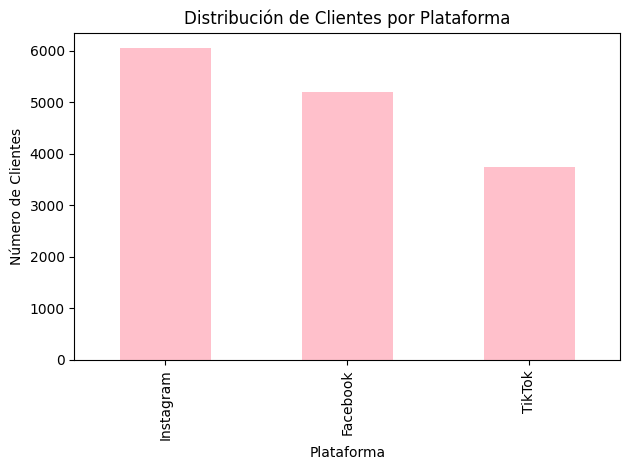

In [ ]:
import matplotlib.pyplot as plt

distribucion.plot(kind='bar', color='pink')
plt.title('Distribución de Clientes por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### P2. ¿Cómo es la distribución de la edad? ¿Hay outliers?


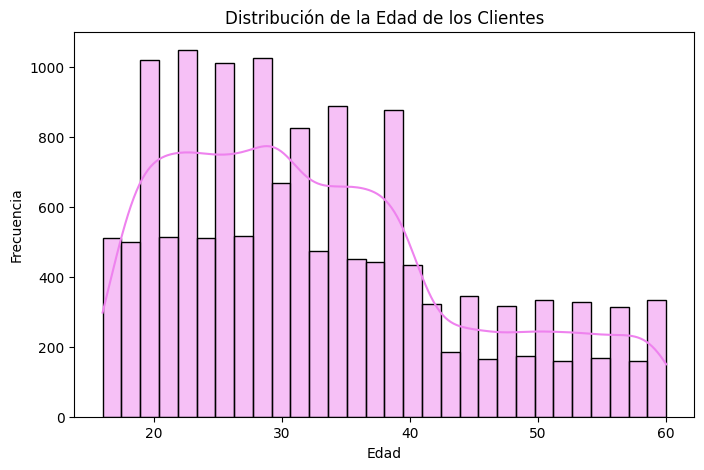

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(clientes['edad'], bins=30, kde=True, color='violet')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1 = clientes['edad'].quantile(0.25)
Q3 = clientes['edad'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = clientes[(clientes['edad'] < limite_inferior) | (clientes['edad'] > limite_superior)]

print(f"Total de posibles outliers en edad: {len(outliers)}")

Total de posibles outliers en edad: 0


In [ ]:
describe = clientes['edad'].describe()
print(describe)

count    15000.000000
mean        32.996733
std         11.385454
min         16.000000
25%         24.000000
50%         31.000000
75%         39.000000
max         60.000000
Name: edad, dtype: float64


### P3. ¿Existe correlación entre ingresos y total_gastado?


In [ ]:
correlacion = clientes['ingresos'].corr(clientes['total_gastado'])

print(f"La correlación entre ingresos y total_gastado es: {correlacion}")

La correlación entre ingresos y total_gastado es: 0.24997121321816387


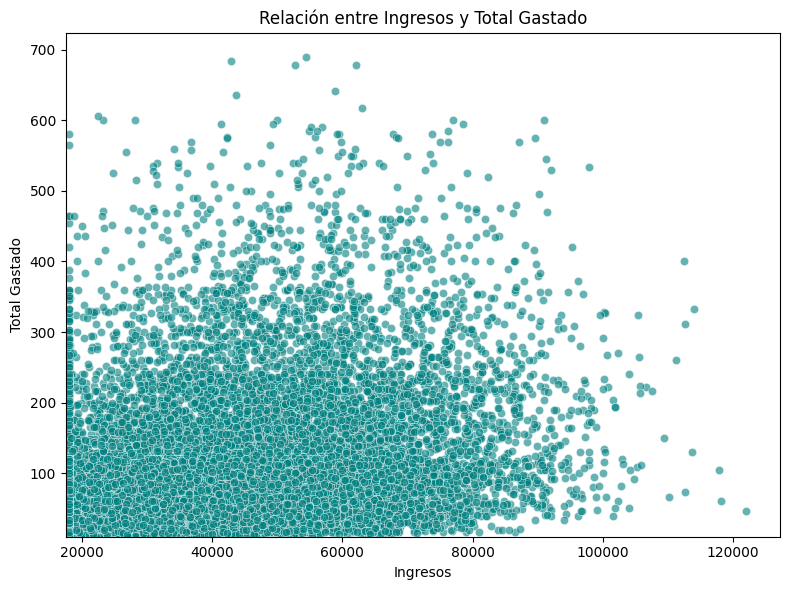

In [ ]:
limite_x = clientes['ingresos'].min()
limite_y = clientes['total_gastado'].min()

plt.figure(figsize=(8,6))
sns.scatterplot(data=clientes, x='ingresos', y='total_gastado', alpha=0.6, color='teal')
plt.title('Relación entre Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.xlim((limite_x)-500)
plt.ylim(limite_y)
plt.grid(False)
plt.tight_layout()
plt.show()

#### 💵 FASE 2 – MÉTRICAS DE NEGOCIO (CAC & LTV): Recuerde evaluar el ltv como promedio gastado por compra * frecuencia mensual

In [ ]:
from datetime import datetime

clientes['fecha_primer_compra'] = pd.to_datetime(clientes['fecha_primer_compra'])
clientes['fecha_ultima_compra'] = pd.to_datetime(clientes['fecha_ultima_compra'])

clientes['meses_activo'] = ((clientes['fecha_ultima_compra'] - clientes['fecha_primer_compra']) / pd.Timedelta(days=30)).round(1)
clientes['meses_activo'] = clientes['meses_activo'].replace(0, 1)
clientes['promedio_compra'] = clientes['total_gastado'] / clientes['compras']
clientes['frecuencia_mensual'] = clientes['compras'] / clientes['meses_activo']
clientes['ltv'] = clientes['promedio_compra'] * clientes['frecuencia_mensual']

In [ ]:
cac_promedio = clientes['costo_adquisicion'].mean()
ltv_promedio = clientes['ltv'].mean()
print(f"CAC promedio: ${cac_promedio:.2f}")
print(f"LTV promedio: ${ltv_promedio:.2f}")

CAC promedio: $18.85
LTV promedio: $7.44


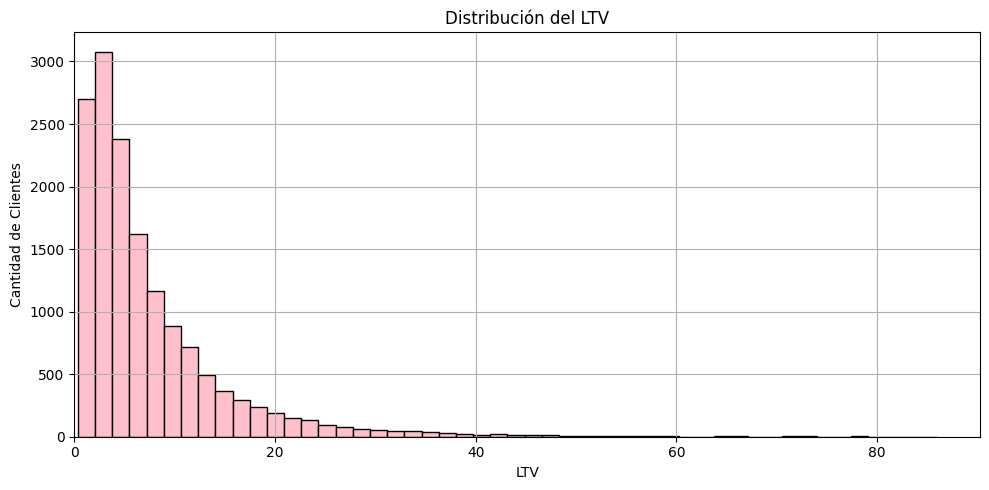

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(clientes['ltv'], bins=50, color='pink', edgecolor='black')
plt.title('Distribución del LTV')
plt.xlabel('LTV')
plt.ylabel('Cantidad de Clientes')
plt.grid(True)
plt.xlim(0)
plt.tight_layout()
plt.show()

### P4. CAC vs LTV por plataforma

In [ ]:
plataforma_metricas = clientes.groupby('plataforma')[['costo_adquisicion', 'LTV']].mean().reset_index()
plataforma_metricas.columns = ['Plataforma', 'CAC promedio', 'LTV promedio']
print(plataforma_metricas)

  Plataforma  CAC promedio  LTV promedio
0   Facebook     25.014014     97.692192
1  Instagram     17.484212     45.356503
2     TikTok     12.460716     29.469898


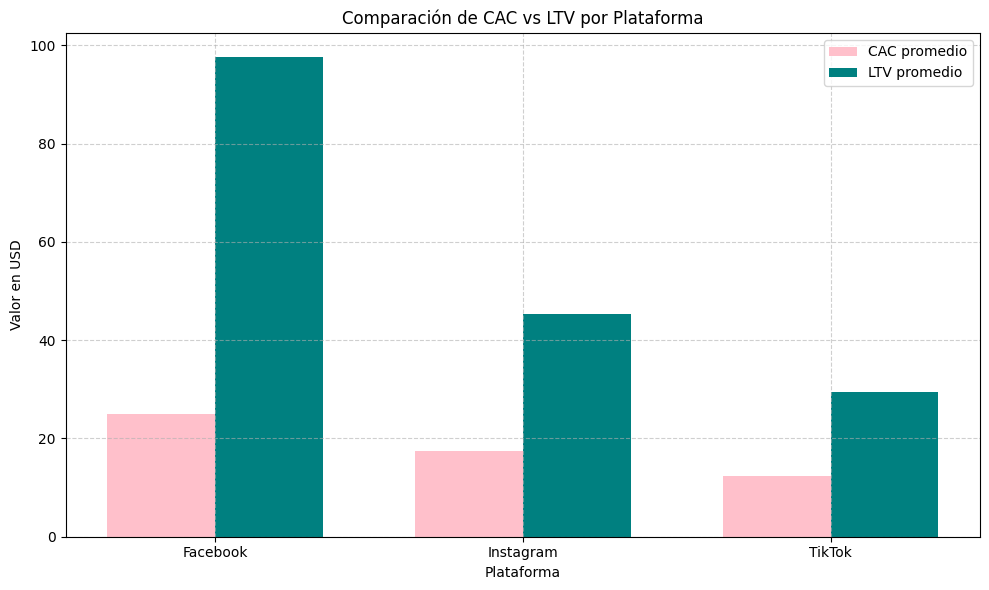

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(plataforma_metricas))
plt.bar(x, plataforma_metricas['CAC promedio'], width=bar_width, label='CAC promedio', color='pink')
plt.bar([i + bar_width for i in x], plataforma_metricas['LTV promedio'], width=bar_width, label='LTV promedio', color='teal')
plt.xlabel('Plataforma')
plt.ylabel('Valor en USD')
plt.title('Comparación de CAC vs LTV por Plataforma')
plt.xticks([i + bar_width / 2 for i in x], plataforma_metricas['Plataforma'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 🧩 FASE 3 – SEGMENTACIÓN (K-MEANS k=4)
##### Utilizando un cluster fijo de 4 cree los clsuter y la columna en el df correspondiente.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
variables = ['edad', 'ingresos', 'compras', 'promedio_ticket', 'total_gastado', 'dias_desde_ultima']
X = clientes[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clientes['cluster'] = kmeans.fit_predict(X_scaled)
print(clientes['cluster'].value_counts())

cluster
0    6101
3    3794
1    3527
2    1578
Name: count, dtype: int64


### P5. Visualiza clusters

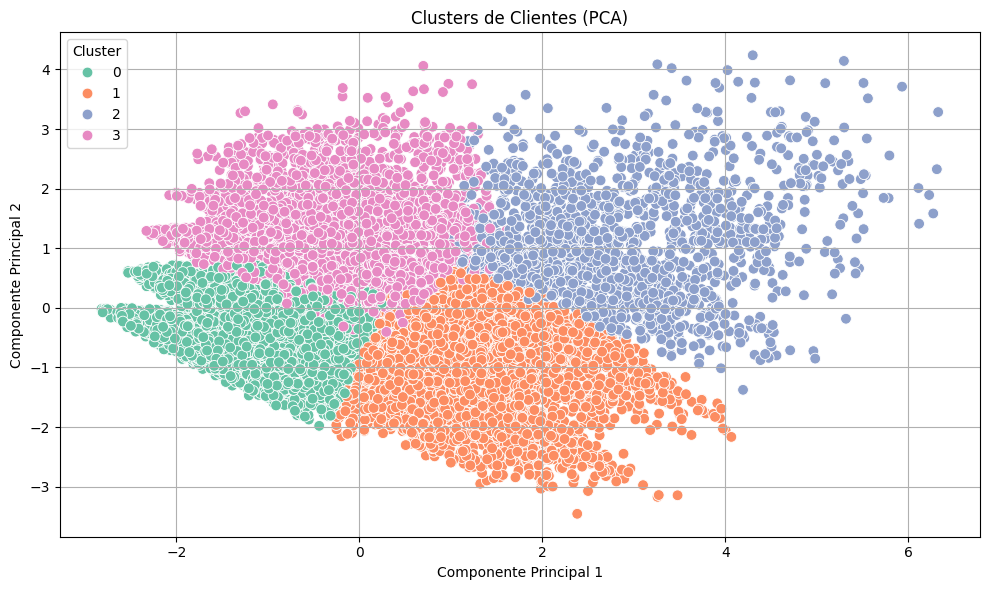

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clientes[['pca1', 'pca2']] = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=clientes, x='pca1', y='pca2', hue='cluster', palette='Set2', s=60)
plt.title('Clusters de Clientes (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

#### CREA LA COLUMNA gananancia resultante entre el ltv- CAC

In [ ]:
clientes['ltv'] = clientes['promedio_ticket'] * clientes['compras']
clientes['ganancia'] = clientes['ltv'] - clientes['costo_adquisicion']
clientes[['id_cliente', 'ltv', 'costo_adquisicion', 'ganancia']].head()

,id_cliente,ltv,costo_adquisicion,ganancia
0,C00000,228,25,203
1,C00001,88,24,64
2,C00002,69,16,53
3,C00003,47,29,18
4,C00004,102,32,70


### P6. Ganancia promedio por cluster

   cluster    ganancia
0        0   32.857237
1        1  104.042813
2        2  306.563371
3        3  102.357143


<ipython-input-124-9b4320387494>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ganancia_cluster, x='cluster', y='ganancia', palette='spring', legend=False)


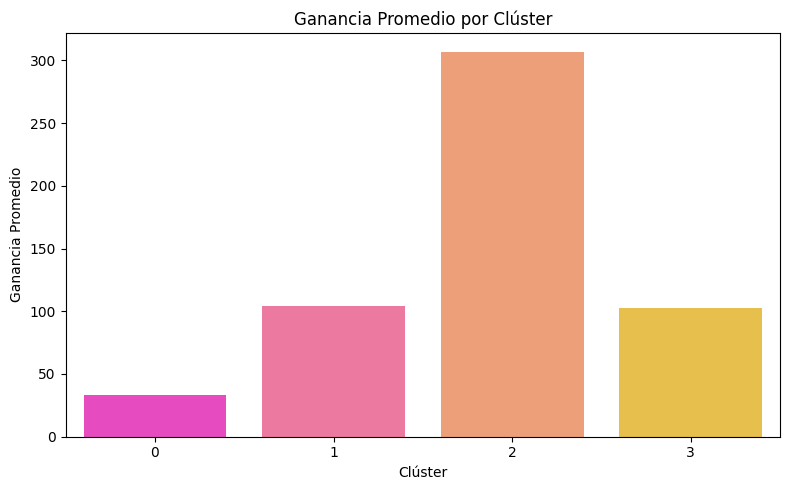

In [ ]:
ganancia_cluster = clientes.groupby('cluster')['ganancia'].mean().reset_index()
print(ganancia_cluster)
plt.figure(figsize=(8, 5))
sns.barplot(data=ganancia_cluster, x='cluster', y='ganancia', palette='spring', legend=False)
plt.title('Ganancia Promedio por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Ganancia Promedio')
plt.tight_layout()
plt.show()

### P7. Género por cluster


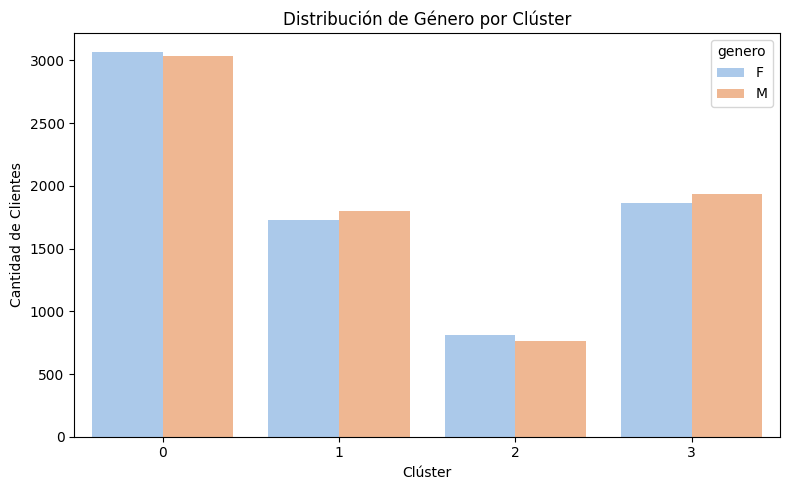

In [ ]:
genero_cluster = clientes.groupby(['cluster', 'genero']).size().reset_index(name='cantidad')
plt.figure(figsize=(8,5))
sns.barplot(data=genero_cluster, x='cluster', y='cantidad', hue='genero', palette='pastel')
plt.title('Distribución de Género por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

### P8. Plataforma por cluster


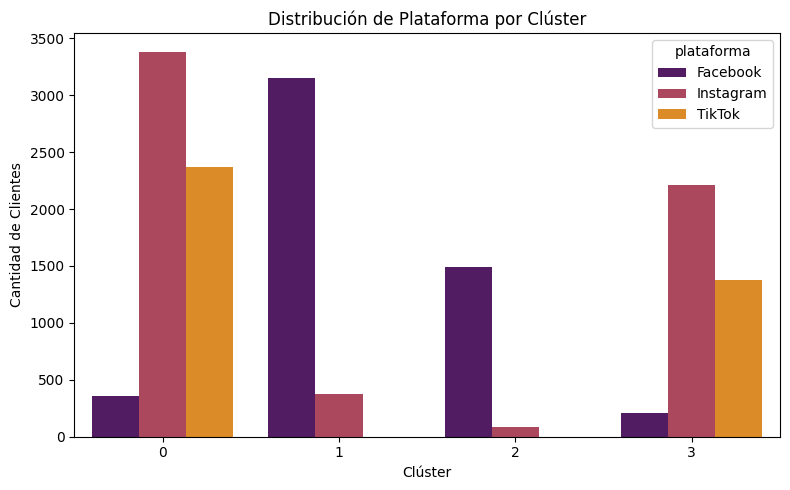

In [ ]:
plataforma_cluster = clientes.groupby(['cluster', 'plataforma']).size().reset_index(name='cantidad')
plt.figure(figsize=(8,5))
sns.barplot(data=plataforma_cluster, x='cluster', y='cantidad', hue='plataforma', palette='inferno')
plt.title('Distribución de Plataforma por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()

### 📝 FASE 5 – PROFILING & NAMING

#### P9. Asigna un nombre a cada cluster y describe en 2-3 líneas su perfil.


Cluster 0 – Clientes fieles Estos son clientes frecuentes, que tiene alto gasto y un promedio acumulado alto al igual que una alta tasa de retención.

Cluster 1 – Clientes con potencial Estos clientes son recientes y tienen un buen ticket promedio, pero tienen una baja frecuencia.
Cluster 2 – Clientes intermitentes Estos son clientes inactivos o que han comprado solo una vez.  
Cluster 3 – Clientes rentables por recomendación.


<Figure size 1200x600 with 0 Axes>

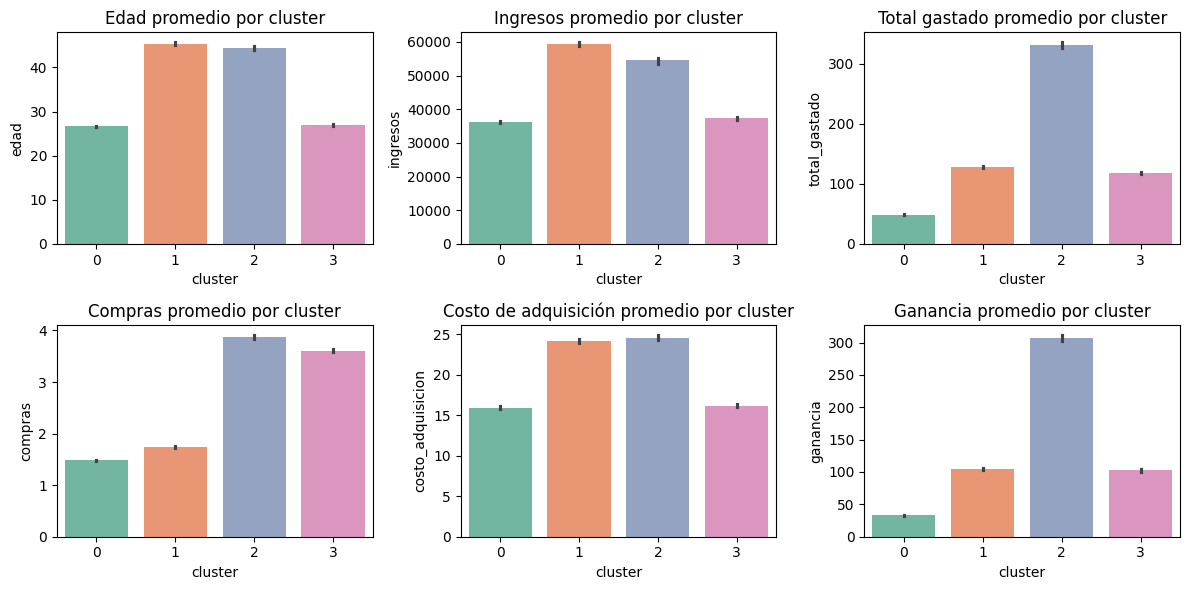

In [ ]:
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
palette = "Set2"

plt.subplot(2, 3, 1)
sns.barplot(x='cluster', y='edad', hue='cluster', data=clientes, palette=palette, legend=False)
plt.title('Edad promedio por cluster')

plt.subplot(2, 3, 2)
sns.barplot(x='cluster', y='ingresos', hue='cluster', data=clientes, palette=palette, legend=False)
plt.title('Ingresos promedio por cluster')

plt.subplot(2, 3, 3)
sns.barplot(x='cluster', y='total_gastado', hue='cluster', data=clientes, palette=palette, legend=False)
plt.title('Total gastado promedio por cluster')

plt.subplot(2, 3, 4)
sns.barplot(x='cluster', y='compras', hue='cluster', data=clientes, palette=palette, legend=False)
plt.title('Compras promedio por cluster')

plt.subplot(2, 3, 5)
sns.barplot(x='cluster', y='costo_adquisicion', hue='cluster', data=clientes, palette=palette, legend=False)
plt.title('Costo de adquisición promedio por cluster')

plt.subplot(2, 3, 6)
sns.barplot(x='cluster', y='ganancia', hue='cluster', data=clientes, palette=palette, legend=False)
plt.title('Ganancia promedio por cluster')

plt.tight_layout()
plt.show()

### 💡 FASE 6 – DECISIÓN DE PRESUPUESTO

#### P10. Con 10 000 USD elige 2 clusters y asigna presupuesto.


In [ ]:
presupuesto_total = 10000
clusters_objetivo = [1, 3]

clientes_por_cluster = clientes[clientes['cluster'].isin(clusters_objetivo)].groupby('cluster')['id_cliente'].count()
proporciones = clientes_por_cluster / clientes_por_cluster.sum()
presupuesto_por_cluster = proporciones * presupuesto_total

print("Presupuesto asignado por cluster:")
print(presupuesto_por_cluster.round(2))

Presupuesto asignado por cluster:
cluster
1    4817.65
3    5182.35
Name: id_cliente, dtype: float64


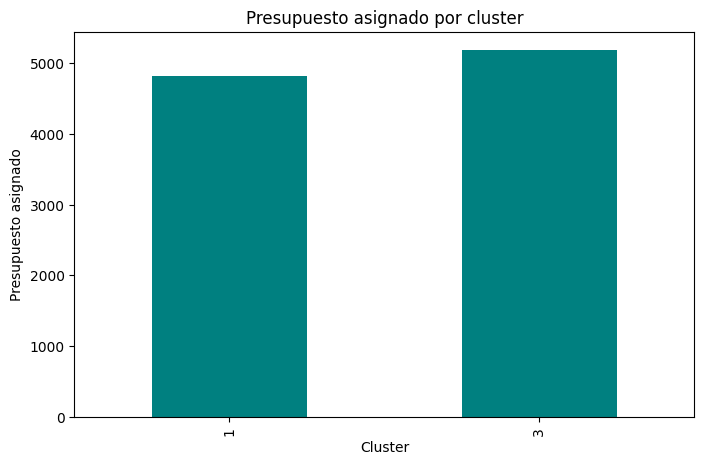

In [ ]:
plt.figure(figsize=(8,5))
presupuesto_por_cluster.plot(kind='bar', color='Teal')
plt.title("Presupuesto asignado por cluster")
plt.xlabel("Cluster")
plt.ylabel("Presupuesto asignado")
plt.show()

#### P11. ¿Qué cluster fidelizarías con bajo costo?





In [ ]:
costo_fidelizacion_por_cliente = presupuesto_por_cluster / clientes_por_cluster

print("Costo de fidelización por cliente por cluster:")
print(costo_fidelizacion_por_cliente.round(4))

cluster_bajo_costo = costo_fidelizacion_por_cliente.idxmin()
print(f"\nEl cluster con el costo de fidelización más bajo es el cluster {cluster_bajo_costo}.")



Costo de fidelización por cliente por cluster:
cluster
1    1.3659
3    1.3659
Name: id_cliente, dtype: float64

El cluster con el costo de fidelización más bajo es el cluster 1.


#### P12. Enumera 2 riesgos o limitaciones del análisis.

1. Simplificación excesiva de la realidad del cliente
El clustering agrupa clientes según patrones numéricos, pero no considera matices cualitativos importantes (como motivaciones de compra, satisfacción o competencia). Esto puede llevar a estrategias de fidelización mal enfocadas si se confía únicamente en los datos históricos.

2. Dependencia de variables seleccionadas y número de clusters
Los resultados del clustering cambian drásticamente si se eligen otras variables o un número distinto de clusters. Además, usar solo 4 variables (interacciones, compras, gasto, costo) puede dejar fuera factores clave del comportamiento del cliente.

### ENTREGA FINAL
#### Resumen ejecutivo (máx 1 página) con:
##### – Nombres y descripciones de los 4 clusters
##### – Tabla LTV, CAC, Ganancia, tamaño
##### – Plan de inversión y justificación
#### Comentarios sobre cómo mejorarías el dataset o la metodología

**Resumen Ejecutivo**
 Nombres y descripciones de los 4 clusters:
 Cluster 1: